# Assessment - Machine Learning, Data Coordinator with eHealth Africa

© 2024

---

## Section B

eHealth Africa has carried out investigation on various factors that can cause heart disease. The data on patients with the heart disease are collected in the southern and northern part of Nigeria and the description of the data is shown in Table 1.

### Table 1: Heart Disease Data Dictionary

| Variable Name | Description                               | Role   | Type     | Units     |
|---------------|-------------------------------------------|--------|----------|-----------|
| `age`           | age of the patient                        | Feature| Integer  | years     |
| `sex`           | gender of the patient                     | Feature| Categorical | -      |
| `cp`            | Chest pain type                           | Feature| Categorical | -      |
| `trestbps`      | resting blood pressure (on admission to the hospital) | Feature | Integer | mm/Hg |
| `chol`          | serum cholesterol                         | Feature| Integer  | mg/dl    |
| `fbs`           | fasting blood sugar > 120 mg/dl           | Feature| Categorical | -      |
| `restecg`       | Resting electrocardiographic results      | Feature| Categorical | -      |
| `thalach`       | maximum heart rate achieved               | Feature| Integer  | -         |
| `exang`         | exercise induced angina                   | Feature| Categorical | -      |
| `oldpeak`       | ST depression induced by exercise  relative to rest        | Feature| Float    | - |
| `slope`         | Slope of the peak exercise ST segment     | Feature| Categorical | -      |
| `ca`            | number of major vessels (0-3) colored by fluoroscopy | Feature | Integer | - |
| `thal`          | Thallium stress test                      | Feature| Categorical | -      |
| `status`        | diagnosis of heart disease                | Target | Categorical | -      |

- GOAL: Predict the presence of heart disease in patients using machine learning models and data science techniques for predictive modelling and risk analysis, particularly in the healthcare sector.
- Dataset: Heart disease data from southern and northern Nigeria.



# Library Imports

In [1]:
# Standard Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json


from sklearn.svm import SVC
# Machine Learning Libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


# Data Loading and Initial Exploration

In [2]:
# Load datasets
DATA_PATH_North = os.getenv("DATA_PATH", default="northern heart diease data.csv")
DATA_PATH_South = os.getenv("DATA_PATH", default="southern heart disease data.csv")
df_north = pd.read_csv(DATA_PATH_North)
df_south = pd.read_csv(DATA_PATH_South)

In [3]:
display(df_north.head())
display(df_south.head())


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,status
0,63.0,male,typical angina,145.0,233,True,2,150,no,2.3,downsloping,0.0,fixed defect,absent
1,67.0,male,asymptomatic,160.0,286,False,2,108,yes,1.5,flat,3.0,normal,present
2,67.0,male,asymptomatic,120.0,229,False,2,129,yes,2.6,flat,2.0,reversable defect,present
3,37.0,male,non-anginal pain,130.0,250,False,0,187,no,3.5,downsloping,0.0,normal,absent
4,41.0,female,atypical angina,130.0,204,False,2,172,no,1.4,upsloping,0.0,normal,absent


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,status,Unnamed: 14,Unnamed: 15
0,70.0,male,asymptomatic,130,322,no,2,109.0,False,2.4,flat,3,normal,present,NaN,NaN
1,67.0,female,non-anginal pain,115,564,no,2,160.0,False,1.6,flat,0,reversable defect,absent,NaN,NaN
2,57.0,male,atypical angina,124,261,no,0,141.0,False,0.3,upsloping,0,reversable defect,present,NaN,NaN
3,64.0,male,asymptomatic,128,263,no,0,105.0,True,0.2,flat,1,reversable defect,absent,NaN,NaN
4,74.0,female,atypical angina,120,269,no,2,121.0,True,0.2,upsloping,1,normal,absent,NaN,NaN


### Data Information Summary for `df_north` and `df_south`

Based on the `.info()` output, both `df_north` and `df_south` DataFrames provide insights into heart disease characteristics across regions, but they vary in row counts, column structures, and missing values.

1. **`df_north`**:
   - Contains **303 rows** with **14 columns**.
   - Column types include `float64`, `int64`, `bool`, and `object`.
   - Key columns such as `age`, `trestbps`, and `ca` have some missing values.
   

2. **`df_south`**:
   - Contains **270 rows** with **16 columns** (two additional columns, `Unnamed: 14` and `Unnamed: 15`, which are completely empty).
   - Column types are similar, though it has an extra `float64` type due to the additional columns.
   - Some columns, such as `age` and `thalach`, also have missing values.

Overall, both datasets contain categorical and numerical features crucial for predictive analysis, but missing values and irrelevant empty columns in `df_south` will need cleaning. The analysis may also require alignment in column structures for consistent modeling.


# Data Consolidation
- Concate dataset
- Check for data type inconsistencies
- Check for duplicates

## Concate Datasets

In [4]:
combined_df = pd.concat([df_north, df_south], axis=0)
display(combined_df.head())


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,status,Unnamed: 14,Unnamed: 15
0,63.0,male,typical angina,145.0,233,True,2,150.0,no,2.3,downsloping,0.0,fixed defect,absent,NaN,NaN
1,67.0,male,asymptomatic,160.0,286,False,2,108.0,yes,1.5,flat,3.0,normal,present,NaN,NaN
2,67.0,male,asymptomatic,120.0,229,False,2,129.0,yes,2.6,flat,2.0,reversable defect,present,NaN,NaN
3,37.0,male,non-anginal pain,130.0,250,False,0,187.0,no,3.5,downsloping,0.0,normal,absent,NaN,NaN
4,41.0,female,atypical angina,130.0,204,False,2,172.0,no,1.4,upsloping,0.0,normal,absent,NaN,NaN


## Check for Data type Inconsistencies

In [5]:
combined_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 573 entries, 0 to 269
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          569 non-null    float64
 1   sex          573 non-null    object 
 2   cp           573 non-null    object 
 3   trestbps     572 non-null    float64
 4   chol         573 non-null    int64  
 5   fbs          573 non-null    object 
 6   restecg      573 non-null    int64  
 7   thalach      570 non-null    float64
 8   exang        573 non-null    object 
 9   oldpeak      573 non-null    float64
 10  slope        573 non-null    object 
 11  ca           569 non-null    float64
 12  thal         571 non-null    object 
 13  status       573 non-null    object 
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
dtypes: float64(7), int64(2), object(7)
memory usage: 76.1+ KB


The `Unnamed: 14` and `Unnamed: 15` Features don't contain any useful contents therefore we would need to drop it in the data cleaning stage.


## Check for Duplicates Values


In [6]:
combined_df.duplicated().sum()

0

There are no duplicate values present in our dataset.

# Data Cleaning
- Drop unwanted features
- Address Datatypes Inconsistencies
- Addressing Missing data
- Outlier Detection

## Drop unwanted Features


In [7]:
combined_df.drop(columns = ['Unnamed: 14', 'Unnamed: 15'], axis = 1, inplace = True)
combined_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,status
0,63.0,male,typical angina,145.0,233,True,2,150.0,no,2.3,downsloping,0.0,fixed defect,absent
1,67.0,male,asymptomatic,160.0,286,False,2,108.0,yes,1.5,flat,3.0,normal,present
2,67.0,male,asymptomatic,120.0,229,False,2,129.0,yes,2.6,flat,2.0,reversable defect,present
3,37.0,male,non-anginal pain,130.0,250,False,0,187.0,no,3.5,downsloping,0.0,normal,absent
4,41.0,female,atypical angina,130.0,204,False,2,172.0,no,1.4,upsloping,0.0,normal,absent


## Missing Values

In [8]:
combined_df.isna().sum()

age         4
sex         0
cp          0
trestbps    1
chol        0
fbs         0
restecg     0
thalach     3
exang       0
oldpeak     0
slope       0
ca          4
thal        2
status      0
dtype: int64

In [9]:
# Impute missing values for each column
# Age
combined_df['age'].fillna(combined_df['age'].median(), inplace=True)

# Trestbps
combined_df['trestbps'].fillna(combined_df['trestbps'].median(), inplace=True)

# Thalach
combined_df['thalach'].fillna(combined_df['thalach'].median(), inplace=True)

# CA (mode)
combined_df['ca'].fillna(combined_df['ca'].mode()[0], inplace=True)

# Thal (mode)
combined_df['thal'].fillna(combined_df['thal'].mode()[0], inplace=True)
combined_df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
status      0
dtype: int64

## Address Data type Inconsistencies

In [10]:
# Convert columns to appropriate data types

# Convert 'age' to categorical
combined_df['age'] = combined_df['age'].astype('int')


# Convert 'trestbps' (Resting blood pressure) to integer
combined_df['trestbps'] = combined_df['trestbps'].astype('int')

# Convert 'restecg' (Resting blood pressure) to integer
combined_df['restecg'] = combined_df['restecg'].astype(str)

# Convert 'thalach' (Resting blood pressure) to integer
combined_df['thalach'] = combined_df['thalach'].astype('int')

combined_df['ca'] = combined_df['ca'].astype('int')
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 573 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       573 non-null    int32  
 1   sex       573 non-null    object 
 2   cp        573 non-null    object 
 3   trestbps  573 non-null    int32  
 4   chol      573 non-null    int64  
 5   fbs       573 non-null    object 
 6   restecg   573 non-null    object 
 7   thalach   573 non-null    int32  
 8   exang     573 non-null    object 
 9   oldpeak   573 non-null    float64
 10  slope     573 non-null    object 
 11  ca        573 non-null    int32  
 12  thal      573 non-null    object 
 13  status    573 non-null    object 
dtypes: float64(1), int32(4), int64(1), object(8)
memory usage: 58.2+ KB


## Outlier Detection

In [11]:
combined_df.select_dtypes('number').skew()

age        -0.188499
trestbps    0.712252
chol        1.153514
thalach    -0.541924
oldpeak     1.263116
ca          1.206261
dtype: float64

trestbps (0.712252): Moderate positive skew; We consider adjusting.
chol (1.153514): High positive skew; likely requires adjustment.
oldpeak (1.263116): High positive skew; likely requires adjustment.

In [12]:
combined_df[['age', 'chol', 'ca', 'thalach', 'oldpeak', 'trestbps']].head()

,age,chol,ca,thalach,oldpeak,trestbps
0,63,233,0,150,2.3,145
1,67,286,3,108,1.5,160
2,67,229,2,129,2.6,120
3,37,250,0,187,3.5,130
4,41,204,0,172,1.4,130


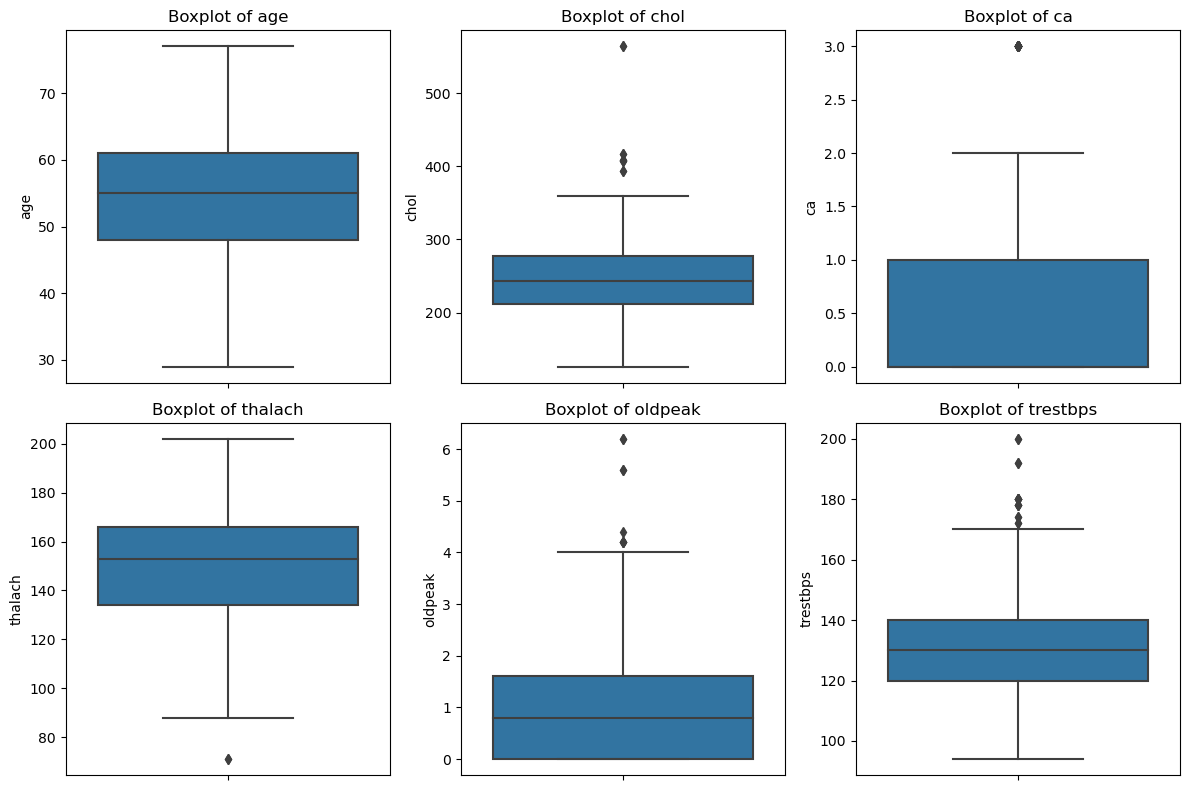

In [13]:
# Define the columns to visualize
columns_to_plot = ['age', 'chol', 'ca', 'thalach', 'oldpeak', 'trestbps']

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Plot each feature as a boxplot
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)  # Adjust the grid if needed (e.g., 2x3 layout for 6 plots)
    sns.boxplot(y=combined_df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


## Apply Log Transform to Address Outlier

In [14]:
combined_df['trestbps'] = np.log(combined_df['trestbps'] + 1)
combined_df['oldpeak'] = np.log(combined_df['oldpeak'] + 1)
combined_df['chol'] = np.log(combined_df['chol'] + 1)
combined_df.select_dtypes('number').skew()

age        -0.188499
trestbps    0.286174
chol        0.085365
thalach    -0.541924
oldpeak     0.374041
ca          1.206261
dtype: float64

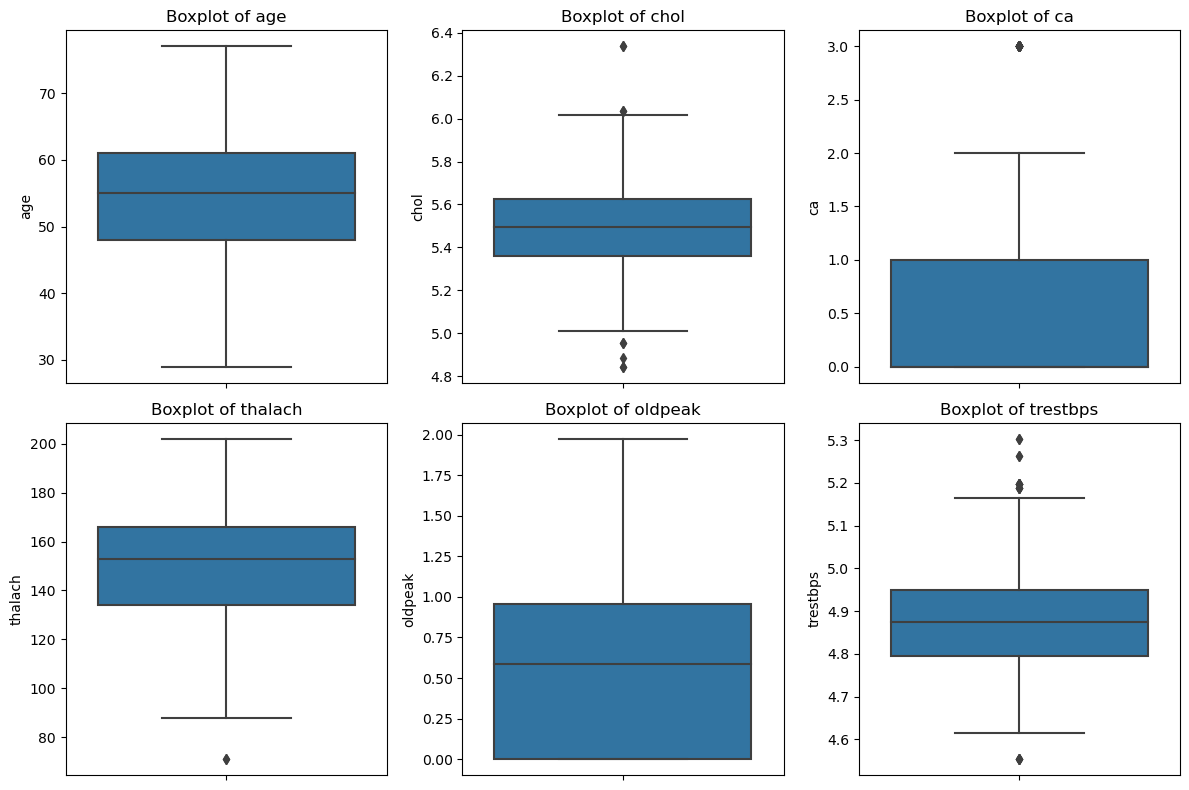

In [15]:
# Define the columns to visualize
columns_to_plot = ['age', 'chol', 'ca', 'thalach', 'oldpeak', 'trestbps']

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Plot each feature as a boxplot
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)  # Adjust the grid if needed (e.g., 2x3 layout for 6 plots)
    sns.boxplot(y=combined_df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


# Feature Engineering
- Categorical Encoding
- Scaling Numerical Features

In [16]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 573 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       573 non-null    int32  
 1   sex       573 non-null    object 
 2   cp        573 non-null    object 
 3   trestbps  573 non-null    float64
 4   chol      573 non-null    float64
 5   fbs       573 non-null    object 
 6   restecg   573 non-null    object 
 7   thalach   573 non-null    int32  
 8   exang     573 non-null    object 
 9   oldpeak   573 non-null    float64
 10  slope     573 non-null    object 
 11  ca        573 non-null    int32  
 12  thal      573 non-null    object 
 13  status    573 non-null    object 
dtypes: float64(3), int32(3), object(8)
memory usage: 60.4+ KB


In [17]:
combined_df['fbs'] = combined_df['fbs'].replace({True: 'yes', False: 'no'})
combined_df['exang'] = combined_df['exang'].replace({True : 'yes', False : 'no'})



## Categorical Encoding

In [18]:
# Label Encoding for binary categorical variables
label_encoder = LabelEncoder()
combined_df['sex'] = label_encoder.fit_transform(combined_df['sex'])
combined_df['exang'] = label_encoder.fit_transform(combined_df['exang'])
combined_df['status'] = label_encoder.fit_transform(combined_df['status'])
combined_df['fbs'] = label_encoder.fit_transform(combined_df['fbs'])
combined_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,status
0,63,1,typical angina,4.983607,5.455321,1,2,150,0,1.193922,downsloping,0,fixed defect,0
1,67,1,asymptomatic,5.081404,5.659482,0,2,108,1,0.916291,flat,3,normal,1
2,67,1,asymptomatic,4.795791,5.438079,0,2,129,1,1.280934,flat,2,reversable defect,1
3,37,1,non-anginal pain,4.875197,5.525453,0,0,187,0,1.504077,downsloping,0,normal,0
4,41,0,atypical angina,4.875197,5.323010,0,2,172,0,0.875469,upsloping,0,normal,0


In [19]:
# Apply one-hot encoding for multi-class categorical columns
df_encoded = pd.get_dummies(combined_df, columns=['cp', 'slope', 'thal'], drop_first=True)
df_encoded.head()


,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,status,cp_atypical angina,cp_non-anginal pain,cp_typical angina,slope_flat,slope_upsloping,thal_normal,thal_reversable defect,thal_reversable defect
0,63,1,4.983607,5.455321,1,2,150,0,1.193922,0,0,0,0,1,0,0,0,0,0
1,67,1,5.081404,5.659482,0,2,108,1,0.916291,3,1,0,0,0,1,0,1,0,0
2,67,1,4.795791,5.438079,0,2,129,1,1.280934,2,1,0,0,0,1,0,0,0,1
3,37,1,4.875197,5.525453,0,0,187,0,1.504077,0,0,0,1,0,0,0,1,0,0
4,41,0,4.875197,5.323010,0,2,172,0,0.875469,0,0,1,0,0,0,1,1,0,0


# Data Split

In [20]:
X = df_encoded.drop('status', axis=1)  # Features
y = df_encoded['status']                 # Target

# Step 1: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Data Visualization
Visualize relationships between `age`, `sex`, and `status`

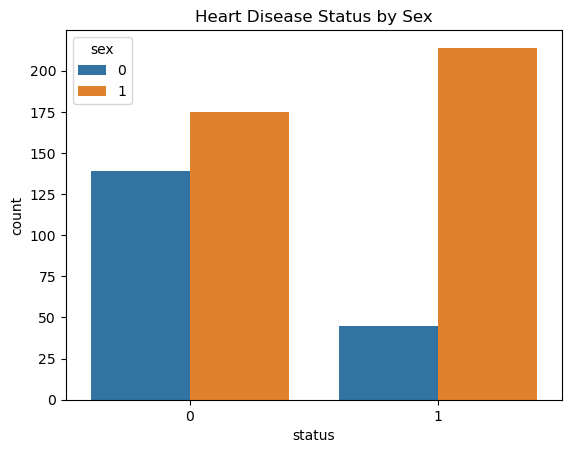

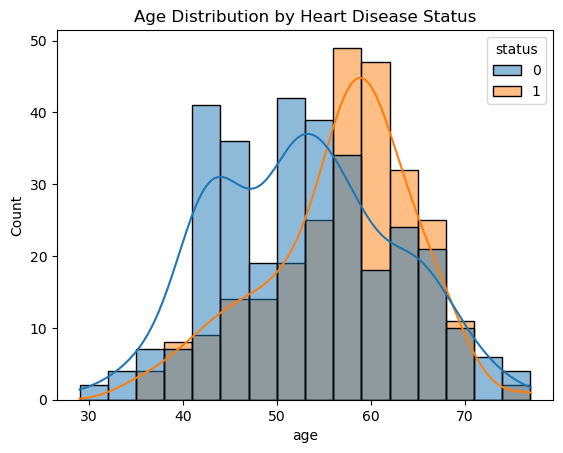

In [22]:
sns.countplot(data=combined_df, x='status', hue='sex')
plt.title("Heart Disease Status by Sex")
plt.show()

sns.histplot(data=combined_df, x='age', hue='status', kde=True)
plt.title("Age Distribution by Heart Disease Status")
plt.show()


# Modelling

In [23]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

## Model Training(Fitting)

In [24]:
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)


## Model Performance (Evaluation)

In [25]:
for model_name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    print(f"{model_name} Evaluation:")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))


Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        65
           1       0.83      0.78      0.80        50

    accuracy                           0.83       115
   macro avg       0.83      0.83      0.83       115
weighted avg       0.83      0.83      0.83       115

[[57  8]
 [11 39]]
Random Forest Evaluation:
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        65
           1       0.87      0.92      0.89        50

    accuracy                           0.90       115
   macro avg       0.90      0.91      0.90       115
weighted avg       0.91      0.90      0.90       115

[[58  7]
 [ 4 46]]
Support Vector Machine Evaluation:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        65
           1       0.78      0.78      0.78        50

    accuracy                           0.81       1

## Hyper-Parameter Tuning(Best Model)

In [27]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
grid_rf.fit(X_train_scaled, y_train)
print(f"Best parameters for Random Forest: {grid_rf.best_params_}")

Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}


## Final RF Evaluation

In [29]:
# Final evaluation with the best hyperparameters
best_rf_model = grid_rf.best_estimator_
y_pred_best = best_rf_model.predict(X_test_scaled)

print("Final Evaluation of Best Model:")
print(classification_report(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))

Final Evaluation of Best Model:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        65
           1       0.90      0.92      0.91        50

    accuracy                           0.92       115
   macro avg       0.92      0.92      0.92       115
weighted avg       0.92      0.92      0.92       115

[[60  5]
 [ 4 46]]


### Model Performance Summary
The final Random Forest model demonstrates high performance in predicting heart disease:

- **Class 0 (No Heart Disease)**: Precision of 94%, Recall of 92%, F1-Score of 0.93.
- **Class 1 (Heart Disease)**: Precision of 90%, Recall of 92%, F1-Score of 0.91.

Overall accuracy is 92%, indicating that the model effectively identifies both heart disease cases and non-cases with minimal errors. The balanced precision and recall across classes suggest it is a reliable tool for heart disease prediction in this dataset.


# Model Explanation

In [30]:
# Feature importance
feature_importances = best_rf_model.feature_importances_
sorted_indices = feature_importances.argsort()[::-1]

# Select the top 10 most important features
top_n = 10
top_indices = sorted_indices[:top_n]
top_feature_importances = feature_importances[top_indices]
top_feature_names = [X_train.columns[i] for i in top_indices]

# Print the top 10 feature rankings
print("Top 10 Feature Ranking:")
for i in range(top_n):
    print(f"{i + 1}. Feature {top_feature_names[i]} ({top_feature_importances[i]:.4f})")


Top 10 Feature Ranking:
1. Feature thalach (0.1326)
2. Feature thal_normal (0.1323)
3. Feature ca (0.1262)
4. Feature oldpeak (0.0947)
5. Feature age (0.0908)
6. Feature trestbps (0.0710)
7. Feature exang (0.0694)
8. Feature chol (0.0676)
9. Feature cp_non-anginal pain (0.0320)
10. Feature slope_flat (0.0299)


# Visualize Feature Importance

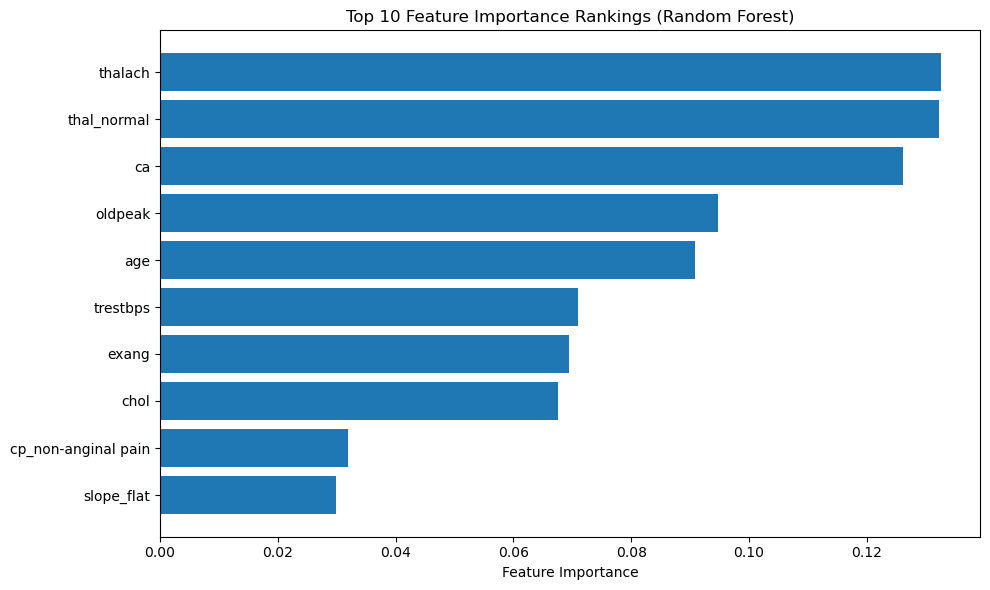

In [31]:
# Feature Importance Bar Chart for Top 10 Features
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), top_feature_importances, align='center')
plt.yticks(range(top_n), top_feature_names)
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importance Rankings (Random Forest)')
plt.gca().invert_yaxis()  # To have the most important feature at the top
plt.tight_layout()
plt.show()

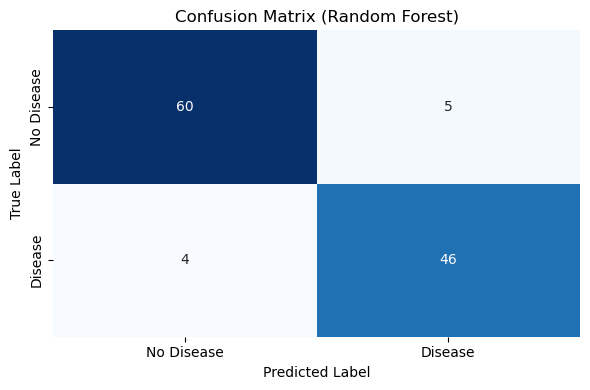

In [32]:
# Confusion Matrix for Random Forest
conf_matrix = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Random Forest)')
plt.tight_layout()
plt.show()
